ASSIGNMENT 5

In [1]:
from matplotlib import pyplot
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import seaborn as sns

(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [2]:
def showImages(num_row,num_col,X,Y):
    import matplotlib.pyplot as plt
    %matplotlib inline

    from sklearn.utils import shuffle
    (X_rand, Y_rand) = shuffle(X, Y)

    fig, axes = plt.subplots(num_row,num_col,figsize = (12,12))
    axes = axes.ravel()
    for i in range(0, num_row*num_col):
        axes[i].imshow(X_rand[i])
        axes[i].set_title("{}".format(labels[Y_rand.item(i)]))
        axes[i].axis('off')
        plt.subplots_adjust(wspace =1)

    return

In [3]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

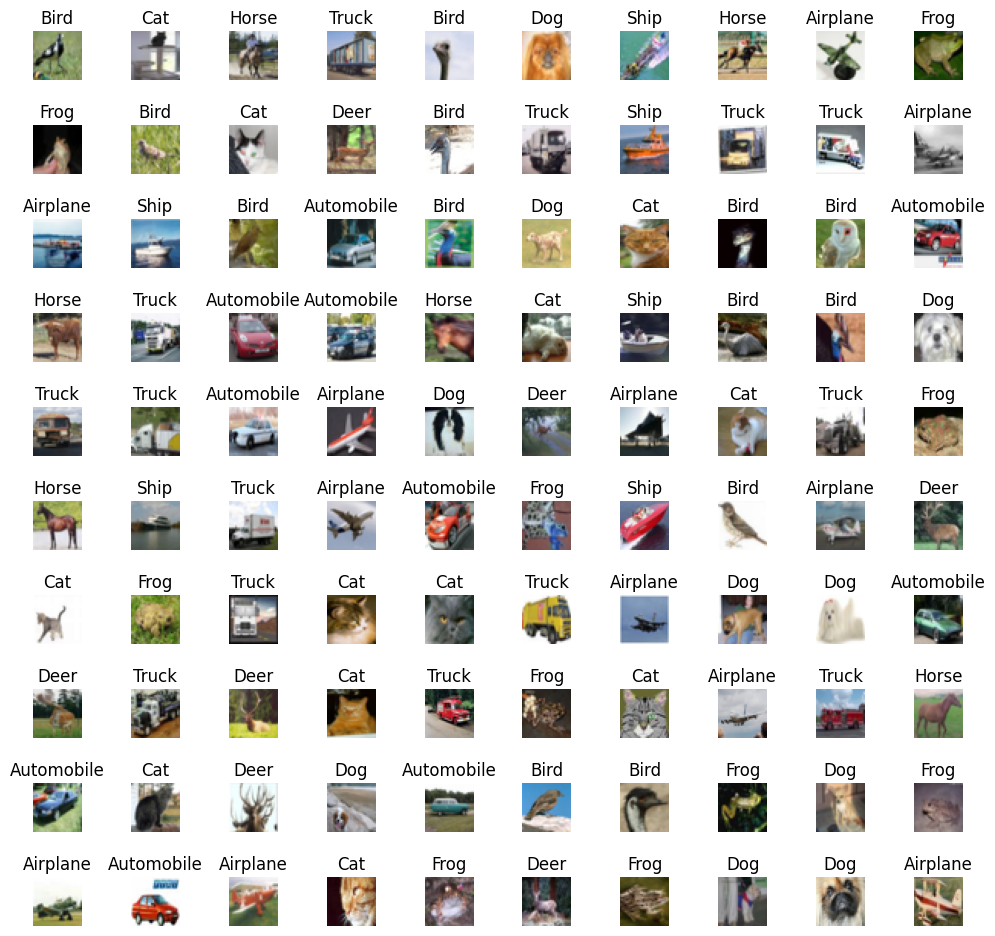

In [4]:
r = 10
c = 10
showImages(r,c,X =x_train,Y = y_train)

In [5]:
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = False

In [6]:
fig,axs = pyplot.subplots(1,2,figsize=(15,5))

sns.countplot(y_train.ravel(), ax=axs[0])
axs[0].set_title('Training Data Distribution')
axs[0].set_xlabel('Classes')

sns.countplot(y_test.ravel(), ax=axs[1])
axs[1].set_title('Testing Data Distribution')
axs[1].set_xlabel('Classes')
pyplot.show()

In [7]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


In [32]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# a softmax classifier
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_6 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_7 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 15, 15, 32)        0         
                                                      

ASSIGNMENT 6

In [9]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [10]:
data=pd.read_csv("/content/drive/MyDrive/connsumerComplaintsSmall.csv")

In [11]:
texts = data['Consumer complaint narrative'].astype(str)
labels = data['Product']

X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

In [12]:
vocab_size = 10000


tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)


max_seq_length = 200
X_train_pad = pad_sequences(X_train_seq, maxlen=max_seq_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_seq_length, padding='post', truncating='post')

In [13]:

label_encoder = LabelEncoder()
all_labels = np.concatenate((y_train, y_test))
label_encoder.fit(all_labels)

y_train_encoded = label_encoder.transform(y_train)

y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

num_classes = len(label_encoder.classes_)

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 64, input_length=max_seq_length),
    tf.keras.layers.SimpleRNN(128, return_sequences=True),
    tf.keras.layers.SimpleRNN(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(X_train_pad, y_train_encoded, epochs=12, batch_size=64, validation_data=(X_test_pad, y_test_encoded))

Epoch 1/12
2/2 [==============================] - 8s 1s/step - loss: 1.8479 - accuracy: 0.1500 - val_loss: 1.4223 - val_accuracy: 0.7619
Epoch 2/12
2/2 [==============================] - 1s 450ms/step - loss: 1.2992 - accuracy: 0.8000 - val_loss: 1.2082 - val_accuracy: 0.7619
Epoch 3/12
2/2 [==============================] - 0s 156ms/step - loss: 1.0484 - accuracy: 0.8000 - val_loss: 1.0730 - val_accuracy: 0.7619
Epoch 4/12
2/2 [==============================] - 0s 170ms/step - loss: 0.8848 - accuracy: 0.8000 - val_loss: 1.0683 - val_accuracy: 0.7619
Epoch 5/12
2/2 [==============================] - 0s 159ms/step - loss: 0.8336 - accuracy: 0.8000 - val_loss: 1.1135 - val_accuracy: 0.7619
Epoch 6/12
2/2 [==============================] - 0s 160ms/step - loss: 0.8405 - accuracy: 0.8000 - val_loss: 1.1602 - val_accuracy: 0.7619
Epoch 7/12
2/2 [==============================] - 0s 178ms/step - loss: 0.8541 - accuracy: 0.8000 - val_loss: 1.1822 - val_accuracy: 0.7619
Epoch 8/12
2/2 [=======

In [16]:
test_loss, test_acc = model.evaluate(X_test_pad, y_test_encoded)
print("Test accuracy:", test_acc)


1/1 [==============================] - 0s 174ms/step - loss: 1.1274 - accuracy: 0.7619
Test accuracy: 0.761904776096344


In [17]:
example_text = ["I am facing issues with my credit card statement."]
example_seq = tokenizer.texts_to_sequences(example_text)
example_pad = pad_sequences(example_seq, maxlen=max_seq_length, padding='post', truncating='post')
predicted_class = np.argmax(model.predict(example_pad), axis=-1)
predicted_product = label_encoder.inverse_transform(predicted_class)[0]
print("Predicted Product:", predicted_product)

1/1 [==============================] - 0s 293ms/step
Predicted Product: Credit reporting, credit repair services, or other personal consumer reports


ASSIGNMENT 7

In [41]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [42]:
train_data = pd.read_csv('/content/drive/MyDrive/emotion-labels-train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/emotion-labels-test.csv')


X_train = train_data['text']
y_train = train_data['label']
X_test = test_data['text']
y_test = test_data['label']


tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_seq_length = 200
X_train_pad = pad_sequences(X_train_seq, maxlen=max_seq_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_seq_length, padding='post', truncating='post')

In [43]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

num_classes = len(np.unique(y_train_encoded))


In [44]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 64, input_length=max_seq_length),
    tf.keras.layers.SimpleRNN(128, return_sequences=True),
    tf.keras.layers.SimpleRNN(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [45]:
model.fit(X_train_pad, y_train_encoded, epochs=10, batch_size=64, validation_data=(X_test_pad, y_test_encoded))

Epoch 1/10
57/57 [==============================] - 70s 1s/step - loss: 1.4013 - accuracy: 0.2892 - val_loss: 1.3914 - val_accuracy: 0.2973
Epoch 2/10
57/57 [==============================] - 14s 248ms/step - loss: 1.4030 - accuracy: 0.2718 - val_loss: 1.3895 - val_accuracy: 0.2613
Epoch 3/10
57/57 [==============================] - 14s 244ms/step - loss: 1.3930 - accuracy: 0.2920 - val_loss: 1.4292 - val_accuracy: 0.2358
Epoch 4/10
57/57 [==============================] - 15s 269ms/step - loss: 1.3968 - accuracy: 0.2967 - val_loss: 1.3841 - val_accuracy: 0.2903
Epoch 5/10
57/57 [==============================] - 14s 243ms/step - loss: 1.3960 - accuracy: 0.2876 - val_loss: 1.4044 - val_accuracy: 0.2829
Epoch 6/10
57/57 [==============================] - 14s 242ms/step - loss: 1.3906 - accuracy: 0.3006 - val_loss: 1.3858 - val_accuracy: 0.3148
Epoch 7/10
57/57 [==============================] - 14s 242ms/step - loss: 1.3955 - accuracy: 0.2873 - val_loss: 1.3789 - val_accuracy: 0.2791
Ep

In [46]:
test_loss, test_acc = model.evaluate(X_test_pad, y_test_encoded)
print("Test accuracy:", test_acc)

99/99 [==============================] - 5s 53ms/step - loss: 1.3901 - accuracy: 0.2836
Test accuracy: 0.2835773527622223


In [47]:
example_text = ["I am feeling happy today."]
example_seq = tokenizer.texts_to_sequences(example_text)
example_pad = pad_sequences(example_seq, maxlen=max_seq_length, padding='post', truncating='post')
predicted_class = np.argmax(model.predict(example_pad), axis=-1)
predicted_emotion = label_encoder.inverse_transform(predicted_class)[0]
print("Predicted Emotion:", predicted_emotion)

1/1 [==============================] - 0s 284ms/step
Predicted Emotion: anger
